In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [50]:
def minimaxit(dk, data, col):
    scaler = MinMaxScaler()
    scaler.fit(data)
    dk.loc[dk["Produit"]==col, "norm_price"] = scaler.transform(data)

In [3]:
df = pd.read_csv("Food_Prices.csv")
df

,Unnamed: 0,Country,ISO3,Produit,Baseline (14-Feb-2020),Price (Latest date),Variation,Currency,Range,Latest date
0,0,Togo,TGO,Fruit et Légume,1502.14,1502.14,0.00,CFA,997.05-2000.67,2020-02-09
1,1,Bhutan,BTN,Fruit et Légume,234.11,234.11,0.00,₹,200.77-250.39,2020-02-09
2,2,Angola,AGO,Fruit et Légume,4.07,4.07,0.00,$,4-4.14,2020-02-09
3,3,Aruba,ABW,Fruit et Légume,4.83,4.83,0.00,$,3.36-7.99,2020-02-09
4,4,Afghanistan,AFG,Fruit et Légume,66.22,66.22,0.00,AFN,50.3-79.63,2020-02-09
...,...,...,...,...,...,...,...,...,...,...
27729,27729,Vanuatu,VUT,Fruit et Légume,349.68,516.71,47.77,VT,470-550.01,2022-12-04
27730,27730,Yemen,YEM,Fruit et Légume,816.74,1410.52,72.70,﷼,500.01-2499.99,2022-12-04
27731,27731,South Africa,ZAF,Fruit et Légume,22.27,24.56,10.30,R,14-35.01,2022-12-04
27732,27732,Zambia,ZMB,Fruit et Légume,22.63,2.47,-89.09,$,0.88-3.11,2022-12-04


In [6]:
df["Année"] = df["Latest date"].str.split("-", expand=True)[0]
df["Mois"] = df["Latest date"].str.split("-", expand=True)[1]

In [8]:
df = df[["Produit", "Baseline (14-Feb-2020)", "Price (Latest date)", "Variation", "Année", "Mois"]]

In [9]:
df

,Produit,Baseline (14-Feb-2020),Price (Latest date),Variation,Année,Mois
0,Fruit et Légume,1502.14,1502.14,0.00,2020,02
1,Fruit et Légume,234.11,234.11,0.00,2020,02
2,Fruit et Légume,4.07,4.07,0.00,2020,02
3,Fruit et Légume,4.83,4.83,0.00,2020,02
4,Fruit et Légume,66.22,66.22,0.00,2020,02
...,...,...,...,...,...,...
27729,Fruit et Légume,349.68,516.71,47.77,2022,12
27730,Fruit et Légume,816.74,1410.52,72.70,2022,12
27731,Fruit et Légume,22.27,24.56,10.30,2022,12
27732,Fruit et Légume,22.63,2.47,-89.09,2022,12


In [10]:
df.to_csv("Food_price.csv")

In [20]:
df2 = pd.read_excel("FAOSTAT_data.xlsx")

In [21]:
df2 = df2[df2["Produit"]=="Prix à la Consommation, Indices d'alimentation (2015 = 100)"]

In [22]:
df2 = df2[["Zone", "Année", "Mois", "Valeur"]]

In [23]:
scaling2 = pd.DataFrame(df2["Valeur"])
scaler = MinMaxScaler()
scaler.fit(scaling2)
df2.loc[:, "norm_price"] = scaler.transform(scaling2)
df2

,Zone,Année,Mois,Valeur,norm_price
258,Afghanistan,2000,Janvier,24.356332,0.004425
259,Afghanistan,2000,Février,23.636242,0.004289
260,Afghanistan,2000,Mars,23.485345,0.004260
261,Afghanistan,2000,Avril,24.767194,0.004503
262,Afghanistan,2000,Mai,25.956912,0.004728
...,...,...,...,...,...
113487,Palaos,2020,Octobre,106.107892,0.019903
113488,Palaos,2020,Novembre,105.650812,0.019816
113489,Palaos,2020,Décembre,105.193732,0.019730
113490,Palaos,2021,Janvier,105.487569,0.019785


In [24]:
df2.to_csv("FAOSTAT_prix_conso.csv")

In [60]:
df3 = pd.read_excel("food_loss_2000-2022.xlsx")

In [65]:
df3 = df3[df3["pays"].notna()]
df3 = df3[df3["produits"].notna()]
df3 = df3[df3["annee"].notna()]
df3 = df3[df3["perte_pourcentage"].notna()]
df3["annee"] = df3["annee"].astype(int)
df3

,pays,commodity,produits,annee,perte_pourcentage,activity,food_supply_stage,treatment,cause_of_loss
0,Myanmar,"Groundnuts, excluding shelled",légumineuses,2009,5.22,NaN,Whole supply chain,NaN,NaN
1,Myanmar,"Groundnuts, excluding shelled",légumineuses,2008,5.43,NaN,Whole supply chain,NaN,NaN
2,Myanmar,"Groundnuts, excluding shelled",légumineuses,2007,5.61,NaN,Whole supply chain,NaN,NaN
3,Myanmar,"Groundnuts, excluding shelled",légumineuses,2006,5.40,NaN,Whole supply chain,NaN,NaN
4,Myanmar,"Groundnuts, excluding shelled",légumineuses,2005,5.00,NaN,Whole supply chain,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21319,Zambia,Millet,féculents,2005,1.29,Storage,Farm,NaN,NaN
21320,Zambia,Millet,féculents,2005,2.37,Storage,Storage,NaN,NaN
21321,Zambia,Millet,féculents,2005,1.00,Transportation,Transport,NaN,NaN
21322,Zambia,Millet,féculents,2005,3.43,"Drying, Harvesting",Harvest,NaN,NaN


In [71]:
df3["produits"] = df3.produits.replace("féculents", "Féculents")
df3["produits"] = df3.produits.replace("légumineuses", "Légumineuses")

In [72]:
df3.produits.unique()

array(['Légumineuses', 'Féculents', 'Lait', 'fruits et légumes', 'œufs',
       'Elevage et viande', 'Céréales', 'Micro nutrition', 'tubercules',
       'Produis laitiers', 'céréales', 'Huile et oléagineaux', 'sucre',
       'boissons'], dtype=object)

In [74]:
df3.to_csv("food_loss_2000-2022.csv")

In [51]:
df4 = pd.read_csv("Dataset_FAOSTAT.csv")

In [52]:
df4 = df4[["Zone", "Produit", "Année", "Valeur"]]

In [53]:
df4 = df4[df4["Produit"]!="Textiles"]

In [54]:
df4.Produit.unique()

array(['Fruit et Légume', 'Céréales', 'Élevage', 'Aliments protéinés',
       'Viande', 'Fibre végétale'], dtype=object)

In [55]:
fruit = pd.DataFrame(df4.loc[df4["Produit"]=="Fruit et Légume", "Valeur"])
cereal = pd.DataFrame(df4.loc[df4["Produit"]=="Céréales", "Valeur"])
elev = pd.DataFrame(df4.loc[df4["Produit"]=="Élevage", "Valeur"])
alimprot = pd.DataFrame(df4.loc[df4["Produit"]=="Aliments protéinés", "Valeur"])
viande = pd.DataFrame(df4.loc[df4["Produit"]=="Viande", "Valeur"])
fibre_veg = pd.DataFrame(df4.loc[df4["Produit"]=="Fibre végétale", "Valeur"])

In [56]:
minimaxit(df4, fruit, "Fruit et Légume")

In [57]:
minimaxit(df4, cereal, "Céréales")
minimaxit(df4, elev, "Élevage")
minimaxit(df4, alimprot, "Aliments protéinés")
minimaxit(df4, viande, "Viande")
minimaxit(df4, fibre_veg, "Fibre végétale")

In [58]:
df4

,Zone,Produit,Année,Valeur,norm_price
0,Afghanistan,Fruit et Légume,2000,75.82,0.000056
1,Afghanistan,Fruit et Légume,2001,72.56,0.000053
2,Afghanistan,Fruit et Légume,2002,76.60,0.000056
3,Afghanistan,Fruit et Légume,2003,62.83,0.000046
4,Afghanistan,Fruit et Légume,2004,67.59,0.000049
...,...,...,...,...,...
51368,Zimbabwe,Fruit et Légume,2017,98.71,0.000073
51369,Zimbabwe,Fruit et Légume,2018,67.31,0.000049
51370,Zimbabwe,Fruit et Légume,2019,47.01,0.000034
51371,Zimbabwe,Fruit et Légume,2020,33.59,0.000024


In [59]:
df4.to_csv("FAOSTAT_prix_prod.csv")

In [77]:
df5 = pd.read_csv("wfp_foodprices_norm_clean.csv", index_col=0)

In [78]:
df5

,Pays,Produit,pt_name,mp_month,mp_year,mp_price,price_norm
0,Afghanistan,Céréales,Retail,1,2014,50.0000,0.000002
1,Afghanistan,Céréales,Retail,2,2014,50.0000,0.000002
2,Afghanistan,Céréales,Retail,3,2014,50.0000,0.000002
3,Afghanistan,Céréales,Retail,4,2014,50.0000,0.000002
4,Afghanistan,Céréales,Retail,5,2014,50.0000,0.000002
...,...,...,...,...,...,...,...
1891415,Zimbabwe,Matière grasse,Retail,6,2021,197.0000,0.000824
1891416,Zimbabwe,Produit sucré,Retail,6,2021,118.3750,0.000843
1891417,Zimbabwe,Micro-nutriment,Retail,6,2021,71.0000,0.004727
1891418,Zimbabwe,Produit sucré,Retail,6,2021,233.3333,0.001664


In [92]:
df5.Pays.unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin', 'Bhutan',
       'Bolivia', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Liberia', 'Libya', 'Madagascar', 'Mali',
       'Mauritania', 'Mexico', 'Mongolia', 'Mozambique', 'Myanmar',
       'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
       'Paraguay', 'Philippines', 'Russian Federation', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sri Lanka', 'Sudan', 'Thailand', 'Togo', 'Turkey',
       'Uganda', 'Ukraine', 'United Republic

In [90]:
df5 = df5[df5["Pays"]!="Zimbabwe"]
df5 = df5[df5["Pays"]!="Zambia"]
df5 = df5[df5["Pays"]!="Zimbabwe"]
df5 = df5[df5["Pays"]!="Kyrgyzstan"]
df5 = df5[df5["Pays"]!="Lao People's Democratic Republic"]
df5 = df5[df5["Pays"]!="Guinea"]
df5 = df5[df5["Pays"]!="Dominican Republic"]
df5 = df5[df5["Pays"]!="Democratic Republic of the Congo"]
df5 = df5[df5["Pays"]!="Djibouti"]
df5 = df5[df5["Pays"]!="Burundi"]
df5 = df5[df5["Pays"]!="Timor-Leste"]
df5 = df5[df5["Pays"]!="Tajikistan"]
df5 = df5[df5["Pays"]!="Swaziland"]
df5 = df5[df5["Pays"]!="Moldova Republic of"]
df5 = df5[df5["Pays"]!="Lebanon"]
df5 = df5[df5["Pays"]!="Lesotho"]
df5 = df5[df5["Pays"]!="Eritrea"]
df5 = df5[df5["Pays"]!="Bassas da India"]
df5 = df5[df5["Pays"]!="Peru"]
df5 = df5[df5["Pays"]!="Syrian Arab Republic"]
df5 = df5[df5["Pays"]!="State of Palestine"]
df5 = df5[df5["Pays"]!="Malawi"]
df5 = df5[df5["Pays"]!="Namibia"]

In [91]:
df5.to_csv("wfp_foodprices_norm_clean.csv")

In [7]:
mdt = pd.read_csv("food_loss_2000-2022.csv", index_col=0)

In [8]:
mdt

,pays,commodity,produits,annee,perte_pourcentage,activity,food_supply_stage,treatment,cause_of_loss
0,Myanmar,"Groundnuts, excluding shelled",Légumineuses,2009,5.22,NaN,Whole supply chain,NaN,NaN
1,Myanmar,"Groundnuts, excluding shelled",Légumineuses,2008,5.43,NaN,Whole supply chain,NaN,NaN
2,Myanmar,"Groundnuts, excluding shelled",Légumineuses,2007,5.61,NaN,Whole supply chain,NaN,NaN
3,Myanmar,"Groundnuts, excluding shelled",Légumineuses,2006,5.40,NaN,Whole supply chain,NaN,NaN
4,Myanmar,"Groundnuts, excluding shelled",Légumineuses,2005,5.00,NaN,Whole supply chain,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21319,Zambia,Millet,Féculents,2005,1.29,Storage,Farm,NaN,NaN
21320,Zambia,Millet,Féculents,2005,2.37,Storage,Storage,NaN,NaN
21321,Zambia,Millet,Féculents,2005,1.00,Transportation,Transport,NaN,NaN
21322,Zambia,Millet,Féculents,2005,3.43,"Drying, Harvesting",Harvest,NaN,NaN


In [97]:
dff = pd.read_csv("wfp_foodprices_norm_clean.csv")

In [93]:
dff.columns

Index(['Unnamed: 0', 'Pays', 'Produit', 'pt_name', 'mp_month', 'mp_year',
       'mp_price', 'price_norm'],
      dtype='object')

In [94]:
dff = pd.DataFrame(dff.groupby("Pays")["price_norm"].mean().sort_values(ascending=False).head(6))

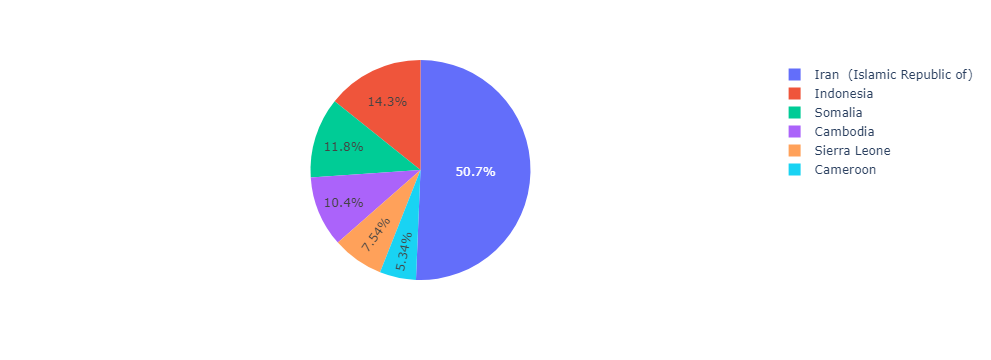

In [98]:
dff = pd.DataFrame(dff.groupby("Pays")["price_norm"].mean().sort_values(ascending=True).tail(6))
px.pie(dff, names=dff.index, values="price_norm")

In [17]:
mdt["cause_of_loss"].value_counts().head(5).keys()

Index(['Physical Losses', 'Insect pest damage',
       'main causes of this were a mismatch in supply and demand or cosmetic and quality related',
       'Mechanical Damage', 'Decay'],
      dtype='object')

In [19]:
mdt["cause_of_loss"].value_counts().head(5).values

array([86, 54, 41, 34, 26], dtype=int64)

In [29]:
mdt.loc[mdt["perte_pourcentage"].sort_values(ascending=False).head(10).index, :]

,pays,commodity,produits,annee,perte_pourcentage,activity,food_supply_stage,treatment,cause_of_loss
7034,Australia,Cauliflowers and broccoli,fruits et légumes,2013,65.00,Processing,Processing,Broccoli,NaN
19703,United States of America,Papayas,fruits et légumes,2008,64.00,"Consumption, Retailing",Households,NaN,NaN
18658,United Republic of Tanzania,"Mangoes, guavas and mangosteens",fruits et légumes,2013,63.00,NaN,Trader,NaN,Rotting
19263,United States of America,Carrots and turnips,fruits et légumes,2014,63.00,Retailing,Retail,NaN,NaN
18981,United States of America,Carrots and turnips,fruits et légumes,2018,62.90,Retailing,Retail,Turnips,NaN
6563,India,Eggplants (aubergines),fruits et légumes,2010,62.50,NaN,Harvest,NaN,NaN
19009,United States of America,Mustard seed,Micro nutrition,2018,61.10,Retailing,Retail,Escarole/endive,NaN
19948,United States of America,Mustard seed,Micro nutrition,2006,60.70,NaN,Retail,NaN,NaN
15223,Viet Nam,Rice,Féculents,2013,60.00,Storage,Storage,Extreme conditions,NaN
17578,Uganda,Maize (corn),Féculents,2017,59.48,NaN,Storage,Traditional storage,NaN


In [31]:
mdt["produits"].value_counts()

Féculents               15100
fruits et légumes        3554
Céréales                  954
Légumineuses              464
Huile et oléagineaux      191
tubercules                185
Elevage et viande         164
Lait                      150
Micro nutrition           149
œufs                      147
sucre                      94
boissons                   78
céréales                   69
Produis laitiers           25
Name: produits, dtype: int64

In [33]:
mdt["food_supply_stage"].unique()

array(['Whole supply chain', 'Farm', 'Harvest', 'Storage', 'Processing',
       'Trader', 'Retail', 'Wholesale', 'Post-harvest', 'Households',
       'Pre-harvest', 'Food Services', 'Transport', 'Export', nan,
       'Distribution', 'Market', 'Stacking', 'Grading', 'Packing'],
      dtype=object)

In [53]:
df.columns

Index(['Unnamed: 0', 'pays', 'commodity', 'produits', 'annee',
       'perte_pourcentage', 'activity', 'food_supply_stage', 'treatment',
       'cause_of_loss'],
      dtype='object')

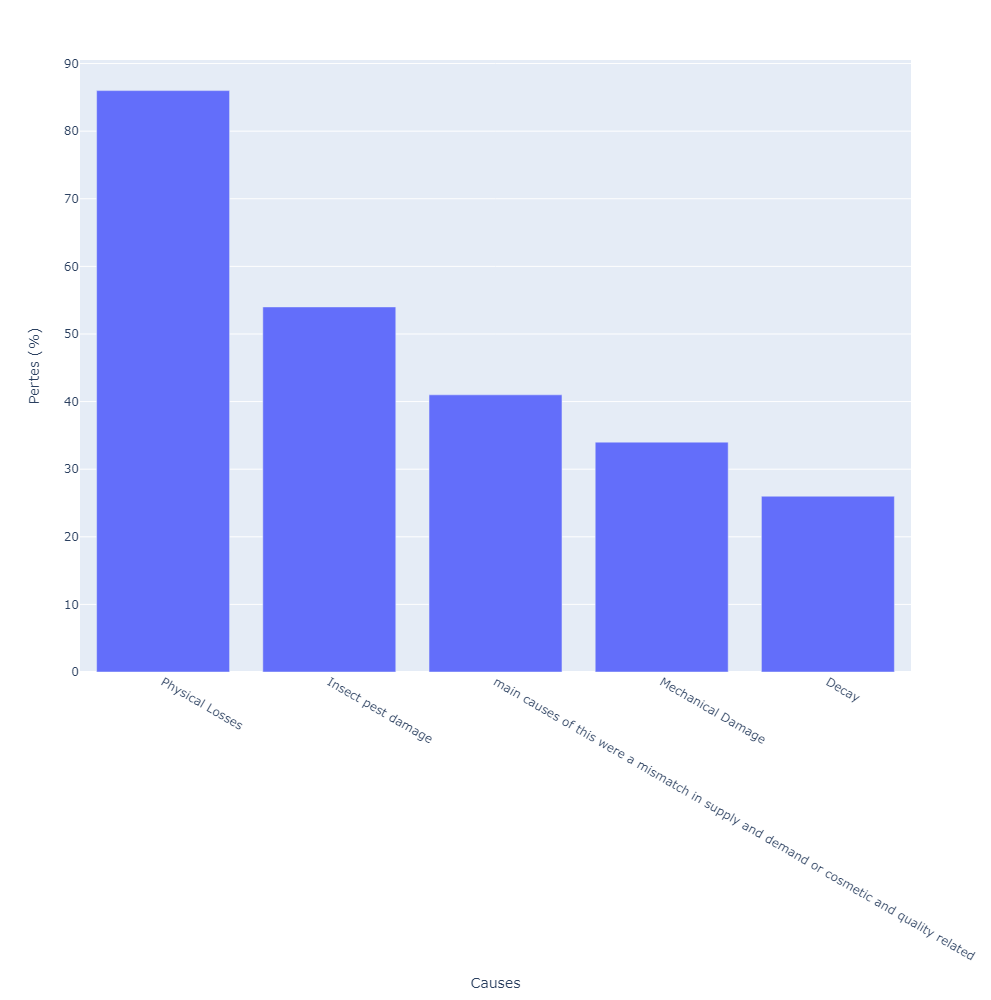

In [52]:
df = pd.read_csv("food_loss_2000-2022.csv")
import plotly.express as px
fig_scatter = px.bar(
    df,
    x=df["cause_of_loss"].value_counts().head(5).keys(),
    y=df["cause_of_loss"].value_counts().head(5).values,
    orientation='v', width=600, height=1000
)

fig_scatter.update_layout(
    xaxis_title="Causes",
    yaxis_title="Pertes (%)",
    
)